In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
%matplotlib inline

#### First, let's download the dataset and look at the data. ####
**Features description:**

- **crim** - per capita crime rate by town.

- **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.

- **indus** - proportion of non-retail business acres per town.

- **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- **nox** - nitrogen oxides concentration (parts per 10 million).

- **rm** - average number of rooms per dwelling.

- **age** - proportion of owner-occupied units built prior to 1940.

- **dis** - weighted mean of distances to five Boston employment centres.

- **rad** - index of accessibility to radial highways.

- **tax** - full-value property-tax rate per \$10,000.

- **ptratio** - pupil-teacher ratio by town.

- **b** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- **lstat** - lower status of the population (percent).

- **medv** - median value of owner-occupied homes in \$1000s (**target feature**).

In [2]:
houses = pd.read_csv("../data/BostonHousing.csv")

houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
houses.shape

(506, 14)

In [4]:
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
houses.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

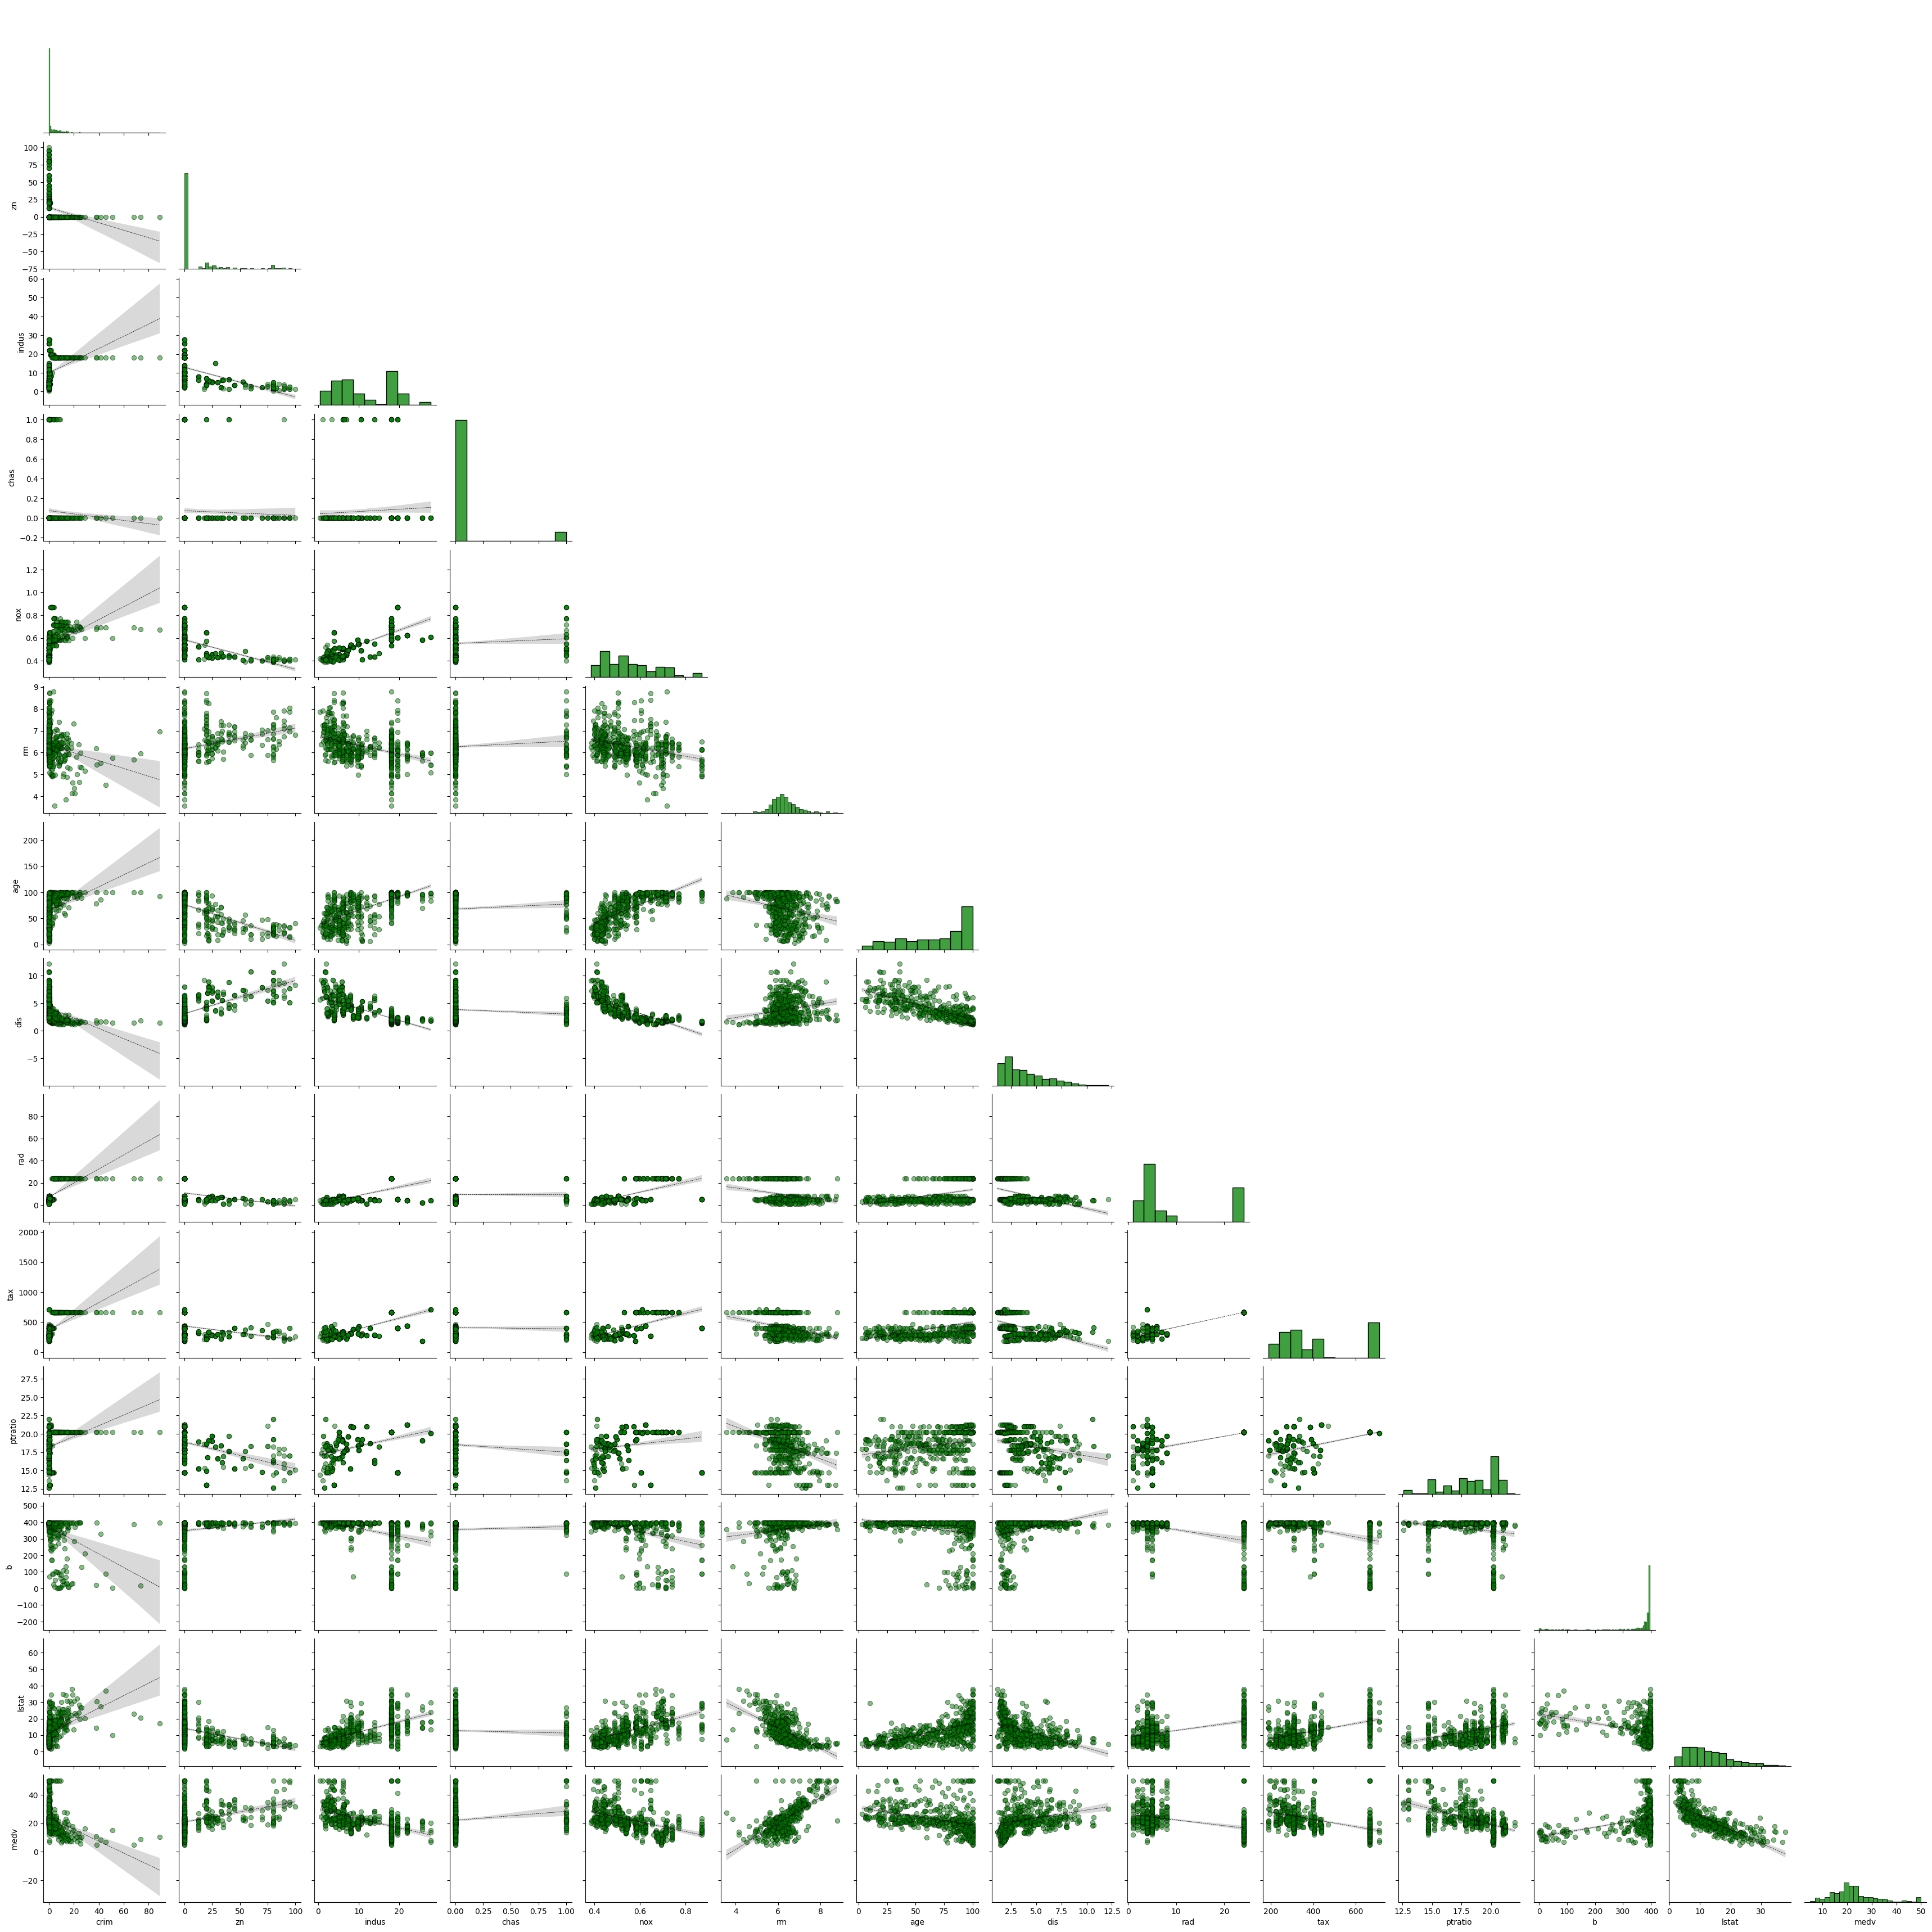

In [6]:
sns.pairplot(houses, kind='reg', corner=True, diag_kws={'color':'green'}, plot_kws={'color':'green', 
             'scatter_kws': {'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
             'line_kws': {'color': 'black', 'linewidth': 0.5, 'linestyle': '--'}});

''

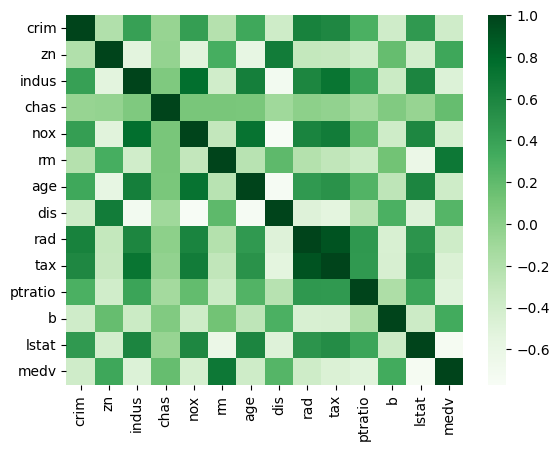

In [7]:
sns.heatmap(houses.corr(), cmap='Greens')
;

''

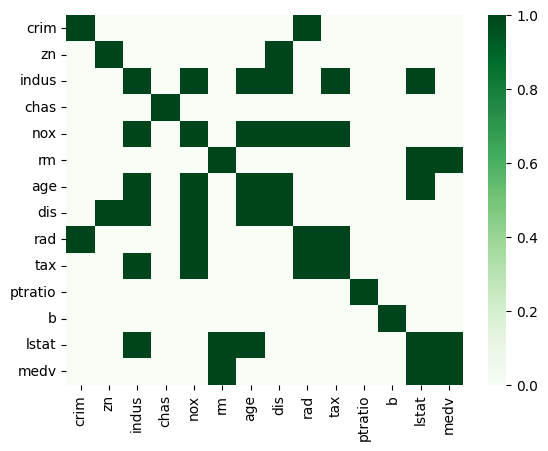

In [8]:
sns.heatmap(houses.corr().abs() > 0.6, cmap='Greens')
;

There are no NAs in the dataset to deal with. Some features correlate with each other.

We need to split the dataset to the target and features, where target is **medv** and standardize the features.

In [9]:
features, target = houses[houses.columns[:-1]], houses[houses.columns[-1]]

features.shape[0] == target.shape[0]

True

#### Standardization of the features. ####

In [10]:
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features.describe().round(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.419,-0.487,-1.556,-0.272,-1.464,-3.876,-2.333,-1.266,-0.982,-1.313,-2.705,-3.903,-1.530
25%,-0.411,-0.487,-0.867,-0.272,-0.912,-0.568,-0.837,-0.805,-0.637,-0.767,-0.488,0.205,-0.799
50%,-0.390,-0.487,-0.211,-0.272,-0.144,-0.108,0.317,-0.279,-0.522,-0.464,0.275,0.381,-0.181
75%,0.007,0.049,1.015,-0.272,0.598,0.482,0.906,0.662,1.660,1.529,0.806,0.433,0.602
max,9.924,3.800,2.420,3.665,2.730,3.552,1.116,3.957,1.660,1.796,1.637,0.441,3.545


#### Full model. ####

In [11]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())
     

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        01:27:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

Let's predict the target values according to our full linear model.

In [12]:
prediction_result = results_scaled.get_prediction(X)
target_pred = prediction_result.predicted_mean
slope, intercept = np.polyfit(target_pred, target, 1)

#### Model diagnosis. Linearity. ####

We will take a look at the linearity of the predicted target values and real target values.

''

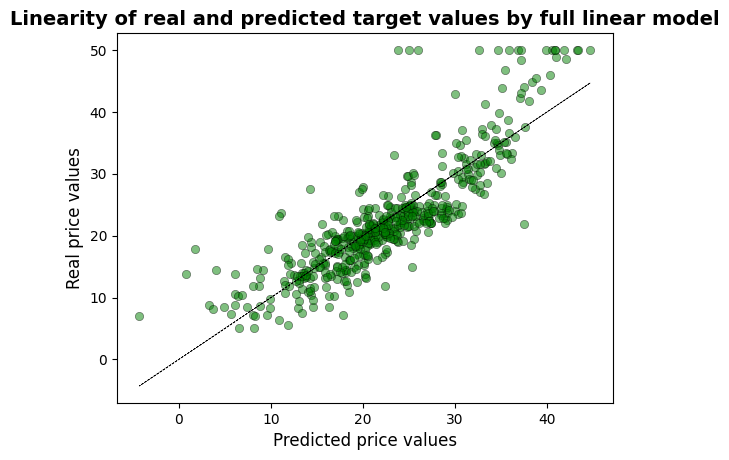

In [13]:
sns.scatterplot(x=target_pred, y=target, color='green', edgecolor='black', alpha=0.5)
plt.title('Linearity of real and predicted target values by full linear model', size=14, weight='bold')
plt.xlabel('Predicted price values', size=12)
plt.ylabel('Real price values', size=12)
plt.plot(target_pred, slope * target_pred + intercept, linewidth=0.5, color='black', linestyle='--')
;

#### Model diagnosis. Influential observations check. ####

To check whether there are some influential observations we will use Cook's distances. The obserb=vations with Cook's distance above 0.025 will be excluded.

In [14]:
influence = results_scaled.get_influence()
cooks = influence.cooks_distance
(cooks[0] > 0.025).sum()

14

''

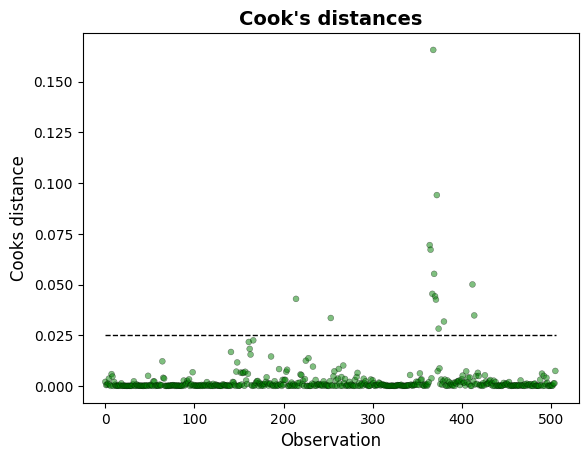

In [15]:
sns.scatterplot(x=scaled_features.index, y=cooks[0], color='green', edgecolor='black', alpha=0.5, size=5, legend=False)
plt.title("Cook's distances", size=14, weight='bold')
plt.xlabel('Observation', size=12)
plt.ylabel('Cooks distance', size=12)
plt.hlines(0.025, 0, 506, color='black', linewidth=1, linestyle='--')
;

In [16]:
scaled_features = scaled_features[cooks[0] < 0.025]

#### Model diagnosis. Independence of observations. ####

For dependent observations identification we will need some additional information that we don't have such as houses from the same neighbourhood built from the same developer. As far as we don't have any features disclosing such information we can not make any assumptions about observations independence.

#### Model diagnosis. Distribution normality and homoscedasticity. ####

Model evaluation using residuals. Density plot, qq-plot and residuals vs fits plots are used. All plots show the residuals do not have neither normal distribution nor homoscedasticity. It is supported by D’Agostino and Pearson’s test.

In [17]:
residuals = target - target_pred

''

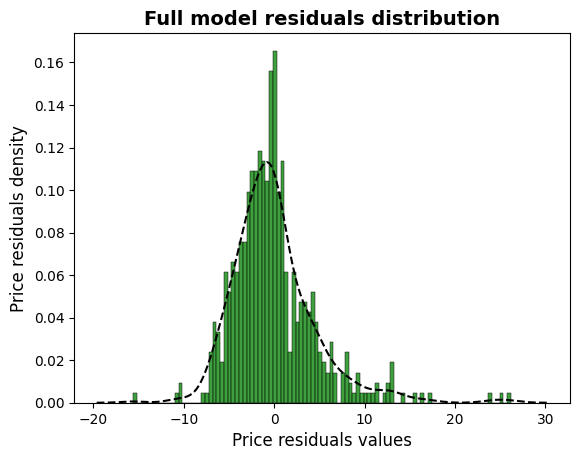

In [18]:
sns.histplot(residuals, bins=100, stat='density', color='green')
sns.kdeplot(residuals, color='black', linestyle='--')
plt.title('Full model residuals distribution', size=14, weight='bold')
plt.ylabel('Price residuals density', size=12)
plt.xlabel('Price residuals values', size=12)
;

''

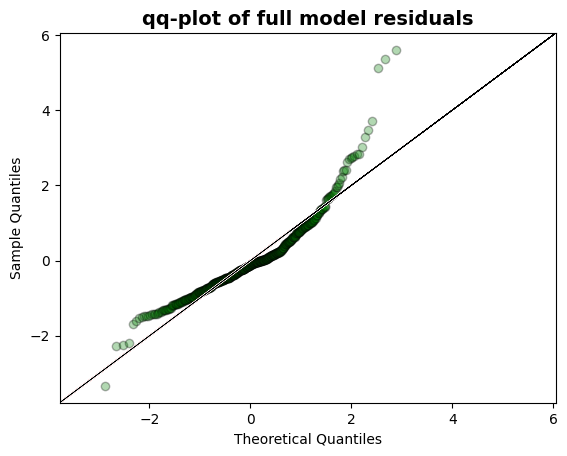

In [19]:
sm.qqplot(residuals, line='45', fit=True, markerfacecolor='green', markeredgecolor='black', alpha=0.3)
plt.plot(target_pred, slope * target_pred + intercept, color='white')
plt.plot(target_pred, slope * target_pred + intercept, color='black', linewidth=0.5)
plt.title('qq-plot of full model residuals', size=14, weight='bold')
;

''

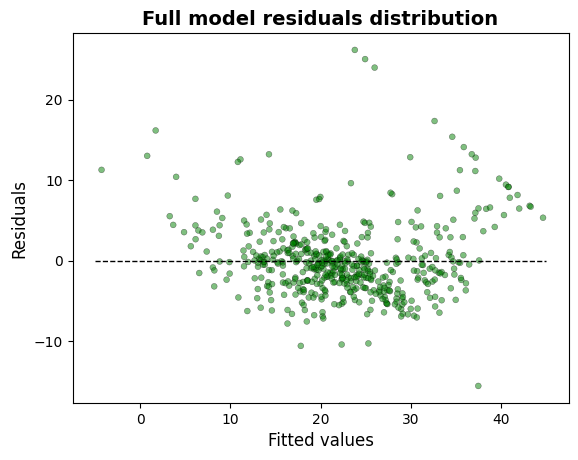

In [65]:
sns.scatterplot(x=target_pred, y=residuals, color='green', edgecolor='black', alpha=0.5, size=3, legend=False)
plt.title('Full model residuals distribution', size=14, weight='bold')
plt.ylabel('Residuals', size=12)
plt.xlabel('Fitted values', size=12)
plt.hlines(0, -5, 45, color='black', linewidth=1, linestyle='--')
;

In [21]:
print('Null hypothesis: residuals variable comes from a normal distribution')
k, p = stats.normaltest(residuals)
alpha = 0.05
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Null hypothesis: residuals variable comes from a normal distribution
p = 2.18204e-39
The null hypothesis can be rejected


''

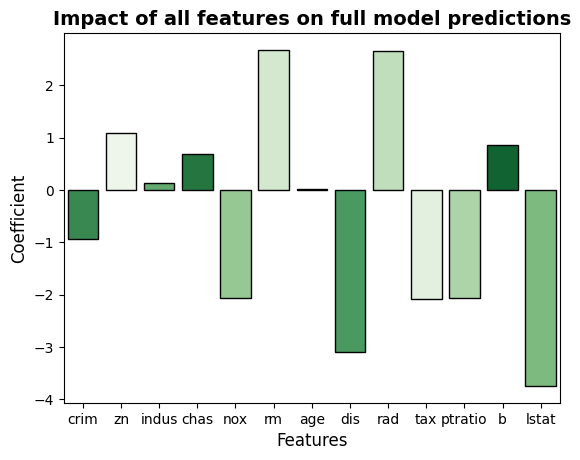

In [22]:
params = results_scaled.params.drop('const')
coefficients = results_scaled.params.index.drop('const')
pal = sns.color_palette("Greens", len(coefficients))
rank = results_scaled.params.index.drop('const').argsort().argsort()
sns.barplot(x=coefficients, y=params, palette=np.array(pal[::-1])[rank], edgecolor='black')
plt.xticks()
plt.title('Impact of all features on full model predictions', size=14, weight='bold')
plt.ylabel('Coefficient', size=12)
plt.xlabel('Features', size=12)
;

It is noticeable that the lstat variable has the biggest absolute coefficient, thus provides the most prediscting effect for our model.

Lstat variable is the percent of the lower status of population.

#### Model based only on lstat ####

Tagret and lstat do not have the linear relation. However, it could be noticed that log(stat) and target are lineary dependent.

In [23]:
houses_main_pred = pd.concat([target, features], axis=1).drop(houses.columns[:-2], axis=1)
houses_main_pred['lstat_log'] = np.log(houses_main_pred.lstat)

''

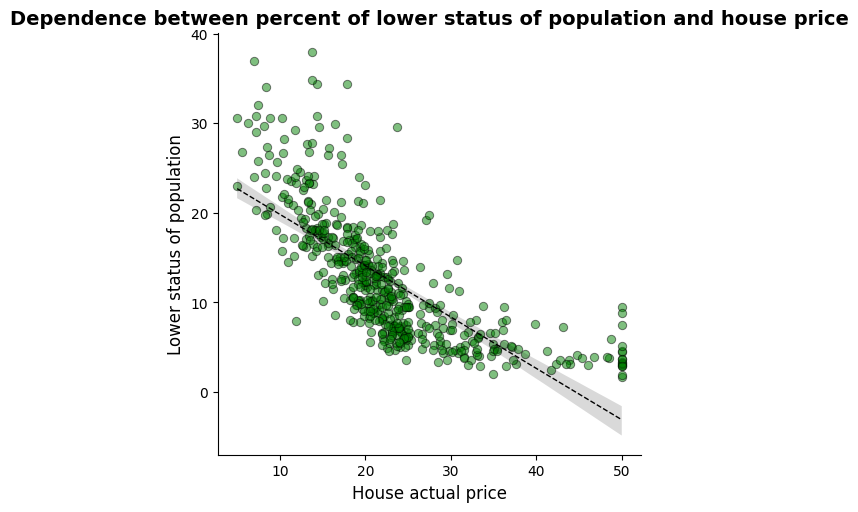

In [24]:
sns.lmplot(x="medv", y="lstat", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
           line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population and house price', size=14, weight='bold')
plt.xlabel('House actual price', size=12)
plt.ylabel('Lower status of population', size=12)
;

''

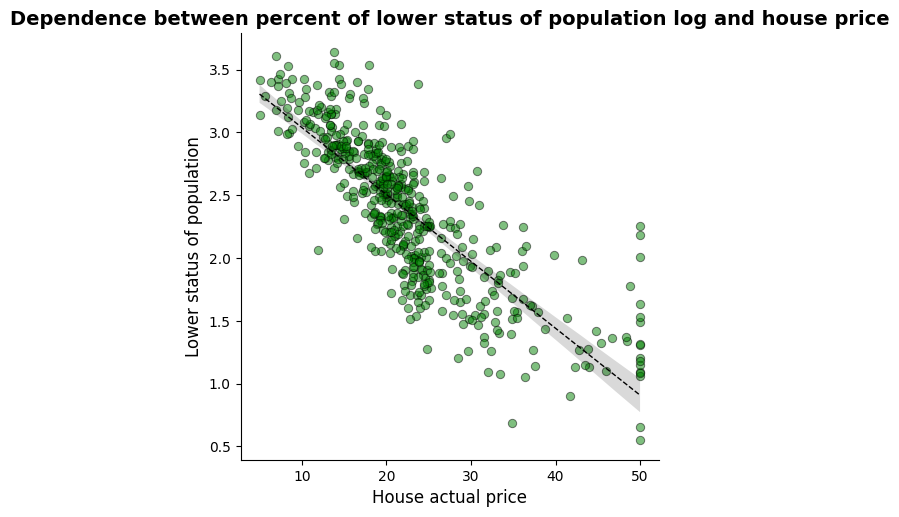

In [25]:
sns.lmplot(x="medv", y="lstat_log", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
           line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population log and house price', size=14, weight='bold')
plt.xlabel('House actual price', size=12)
plt.ylabel('Lower status of population', size=12)
;

In [26]:
houses_main_pred = pd.concat([pd.Series(target_pred), houses_main_pred], axis=1) \
    .rename(columns={0: 'medv_pred'})

''

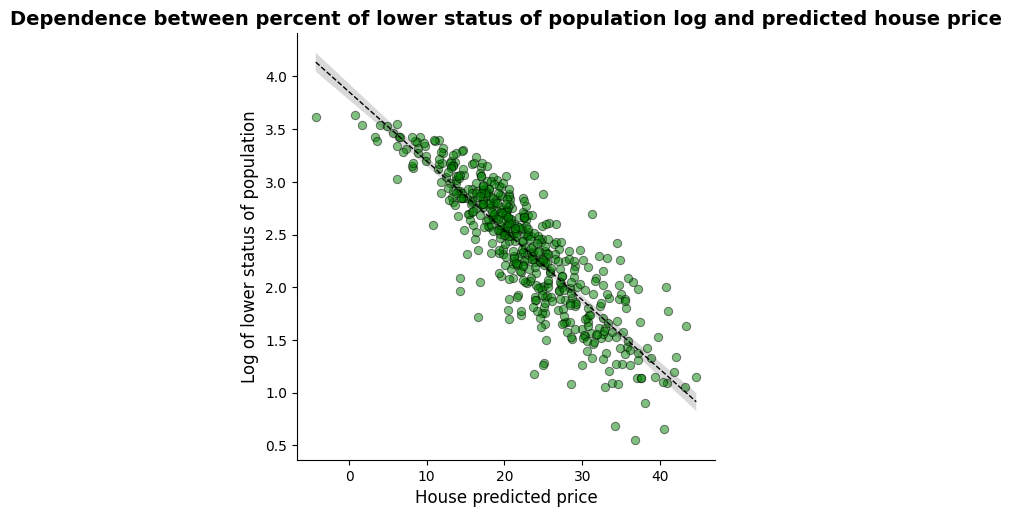

In [27]:
sns.lmplot(x="medv_pred", y="lstat_log", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population log and predicted house price', size=14, weight='bold')
plt.xlabel('House predicted price', size=12)
plt.ylabel('Log of lower status of population', size=12)
;

#### The full model is not perfect because before fitting there was no linearity of target-feature check and the residuals are not distributed normally and are not homoscedastic ####

#### Facultative part ####

Full model on non-preprocessed data:

In [28]:
print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        01:28:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

Data preprocessing. We will take a logarithm of lstat and use it for further model fitting, renormalize data and then fit the model again.

In [29]:
features_cleaned = features[cooks[0] < 0.025]
target_cleaned = target[cooks[0] < 0.025]

In [30]:
features_cleaned['lstat_log'] = np.log(features_cleaned.lstat)
features_processed = features_cleaned.drop('lstat', axis=1)

means_proc = features_processed.mean(axis=0)
stds_proc = features_processed.std(axis=0)

scaled_features_proc = (features_processed - means_proc) / stds_proc

scaled_features_proc.describe().round(3)

/tmp/ipykernel_17761/2458461827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_cleaned['lstat_log'] = np.log(features_cleaned.lstat)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat_log
count,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000,492.000
mean,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.433,-0.494,-1.532,-0.259,-1.444,-3.293,-2.334,-1.277,-0.963,-1.299,-2.668,-3.977,-3.096
25%,-0.423,-0.494,-0.852,-0.259,-0.901,-0.622,-0.856,-0.824,-0.612,-0.747,-0.648,0.206,-0.698
50%,-0.402,-0.494,-0.352,-0.259,-0.177,-0.137,0.302,-0.271,-0.494,-0.436,0.224,0.375,0.103
75%,-0.062,0.089,1.037,-0.259,0.615,0.486,0.917,0.658,-0.142,1.589,0.821,0.425,0.773
max,9.375,3.748,2.441,3.852,2.743,3.696,1.139,3.965,1.734,1.861,1.648,0.433,1.997


In [31]:
X_proc = sm.add_constant(scaled_features_proc)
model_scaled_proc = sm.OLS(target_cleaned, X_proc)
results_scaled_proc = model_scaled_proc.fit()

print(results_scaled_proc.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     214.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          4.63e-190
Time:                        01:28:03   Log-Likelihood:                -1294.3
No. Observations:                 492   AIC:                             2617.
Df Residuals:                     478   BIC:                             2675.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.154    145.026      0.0

Some features still do not linearly related to target variable, some of them are collinear and no homoscedasticity is observed.

Thus, for future features selection VIF with further features exclusion will be used.

It is supposed that predictors with VIF > 5 must be excluded;

In a perfect universe, predictors should have VIF no more than 2.

So, variables would be excluded one by one as long as they have p-value > 0.05 in model summary and VIF > 2.

In [32]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data, vif_data[vif_data.VIF == vif_data.VIF.max()]

In [33]:
print(*calculate_vif(X_proc), sep='\n\n')

      feature       VIF
0       const  1.000000
1        crim  1.970711
2          zn  2.333659
3       indus  3.903298
4        chas  1.069628
5         nox  4.466891
6          rm  2.703214
7         age  3.494099
8         dis  4.011369
9         rad  7.387142
10        tax  8.538913
11    ptratio  1.809044
12          b  1.382387
13  lstat_log  4.298563

   feature       VIF
10     tax  8.538913


Tax feature (full-value property-tax rate per $10,000) should be excluded, presumably due to tax and house price correlation.

In [34]:
model_1 = sm.OLS(target_cleaned, X_proc.drop(columns=["tax"]))
results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     223.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.61e-187
Time:                        01:28:03   Log-Likelihood:                -1303.2
No. Observations:                 492   AIC:                             2632.
Df Residuals:                     479   BIC:                             2687.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.156    142.587      0.0

In [35]:
print(*calculate_vif(X_proc.drop(columns=["tax"])), sep='\n\n')

      feature       VIF
0       const  1.000000
1        crim  1.970045
2          zn  2.217315
3       indus  3.174034
4        chas  1.050450
5         nox  4.446572
6          rm  2.693317
7         age  3.493311
8         dis  4.010909
9         rad  3.049822
10    ptratio  1.801593
11          b  1.381058
12  lstat_log  4.297649

  feature       VIF
5     nox  4.446572


Nox feature (nitrogen oxides concentration) should be excluded.

In [36]:
exclusion = ["tax", "nox"]
model_2 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_2 = model_2.fit()

print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     235.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          2.02e-185
Time:                        01:28:03   Log-Likelihood:                -1311.0
No. Observations:                 492   AIC:                             2646.
Df Residuals:                     480   BIC:                             2696.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.159    140.484      0.0

In [37]:
print(*calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

      feature       VIF
0       const  1.000000
1        crim  1.959886
2          zn  2.217080
3       indus  2.868205
4        chas  1.049785
5          rm  2.633278
6         age  3.225812
7         dis  3.634271
8         rad  2.702569
9     ptratio  1.598098
10          b  1.365323
11  lstat_log  4.296618

      feature       VIF
11  lstat_log  4.296618


lstat_log feature (lg of lower status of the population) should be excluded.

In [38]:
exclusion = ["tax", "nox", "lstat_log"]
model_3 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_3 = model_3.fit()

print("Model summary:\n", results_3.summary())

Model summary:
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     196.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          8.68e-163
Time:                        01:28:03   Log-Likelihood:                -1367.4
No. Observations:                 492   AIC:                             2757.
Df Residuals:                     481   BIC:                             2803.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.178    

In [39]:
print("VIFs:\n", *calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

VIFs:


    feature       VIF
0     const  1.000000
1      crim  1.958699
2        zn  2.215780
3     indus  2.863694
4      chas  1.048888
5        rm  1.408378
6       age  2.440604
7       dis  3.622540
8       rad  2.597021
9   ptratio  1.591275
10        b  1.322478

  feature      VIF
7     dis  3.62254


dis feature (weighted mean of distances to five Boston employment centres) should be excluded.

In [40]:
exclusion = ["tax", "nox", "lstat_log", "dis"]
model_4 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_4 = model_4.fit()

print("Model summary:\n", results_4.summary())

Model summary:
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     201.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          2.51e-157
Time:                        01:28:03   Log-Likelihood:                -1383.0
No. Observations:                 492   AIC:                             2786.
Df Residuals:                     482   BIC:                             2828.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.183    

In [41]:
print("VIFs:\n", *calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

VIFs:


   feature       VIF
0    const  1.000000
1     crim  1.929601
2       zn  1.759363
3    indus  2.475436
4     chas  1.048586
5       rm  1.353950
6      age  2.032942
7      rad  2.585899
8  ptratio  1.531220
9        b  1.322220

  feature       VIF
7     rad  2.585899


rad feature (index of accessibility to radial highways) should be excluded.

In [42]:
exclusion = ["tax", "nox", "lstat_log", "dis", "rad"]
model_5 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_5 = model_5.fit()

print("Model summary:\n", results_5.summary())

Model summary:
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     225.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          9.36e-158
Time:                        01:28:03   Log-Likelihood:                -1384.8
No. Observations:                 492   AIC:                             2788.
Df Residuals:                     483   BIC:                             2825.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.184    

In [43]:
print("VIFs:\n", *calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

VIFs:


   feature       VIF
0    const  1.000000
1     crim  1.443264
2       zn  1.752860
3    indus  2.220847
4     chas  1.048516
5       rm  1.311775
6      age  2.027940
7  ptratio  1.383451
8        b  1.283990

  feature       VIF
3   indus  2.220847


indus feature (proportion of non-retail business acres per town) should be excluded.

In [44]:
exclusion = ["tax", "nox", "lstat_log", "dis", "rad", "indus"]
model_6 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_6 = model_6.fit()

print("Model summary:\n", results_6.summary())

Model summary:
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     257.1
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.33e-158
Time:                        01:28:04   Log-Likelihood:                -1385.7
No. Observations:                 492   AIC:                             2787.
Df Residuals:                     484   BIC:                             2821.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.184    

In [45]:
print("VIFs:\n", *calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

VIFs:


   feature       VIF
0    const  1.000000
1     crim  1.410115
2       zn  1.699451
3     chas  1.043922
4       rm  1.233134
5      age  1.673220
6  ptratio  1.366423
7        b  1.239559

  feature       VIF
2      zn  1.699451


Now zv will be excluded because p_value is above 0.05.

In [46]:
exclusion = ["tax", "nox", "lstat_log", "dis", "rad", "indus", "zn"]
model_7 = sm.OLS(target_cleaned, X_proc.drop(columns=exclusion))
results_7 = model_7.fit()

print("Model summary:\n", results_7.summary())

Model summary:
                             OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     298.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          3.40e-159
Time:                        01:28:04   Log-Likelihood:                -1387.3
No. Observations:                 492   AIC:                             2789.
Df Residuals:                     485   BIC:                             2818.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2835      0.184    

In [47]:
print("VIFs:", *calculate_vif(X_proc.drop(columns=exclusion)), sep='\n\n')

VIFs:

   feature       VIF
0    const  1.000000
1     crim  1.397932
2     chas  1.041677
3       rm  1.199166
4      age  1.243265
5  ptratio  1.272701
6        b  1.238695

  feature       VIF
1    crim  1.397932


Check once more that our features do not correlate with each other. The most significant variable for house price is the number of rooms.

''

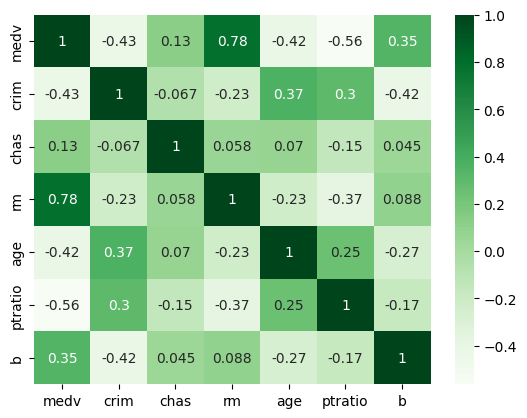

In [48]:
sns.heatmap(pd.concat([target_cleaned, X_proc.drop(columns=exclusion).drop(columns='const')], axis=1).corr(), cmap='Greens', annot=True)
;

In [49]:
prediction_result_final = results_7.get_prediction(X_proc.drop(columns=exclusion))
target_pred_final = prediction_result_final.predicted_mean
slope_final, intercept_final = np.polyfit(target_pred_final, target_cleaned, 1)

''

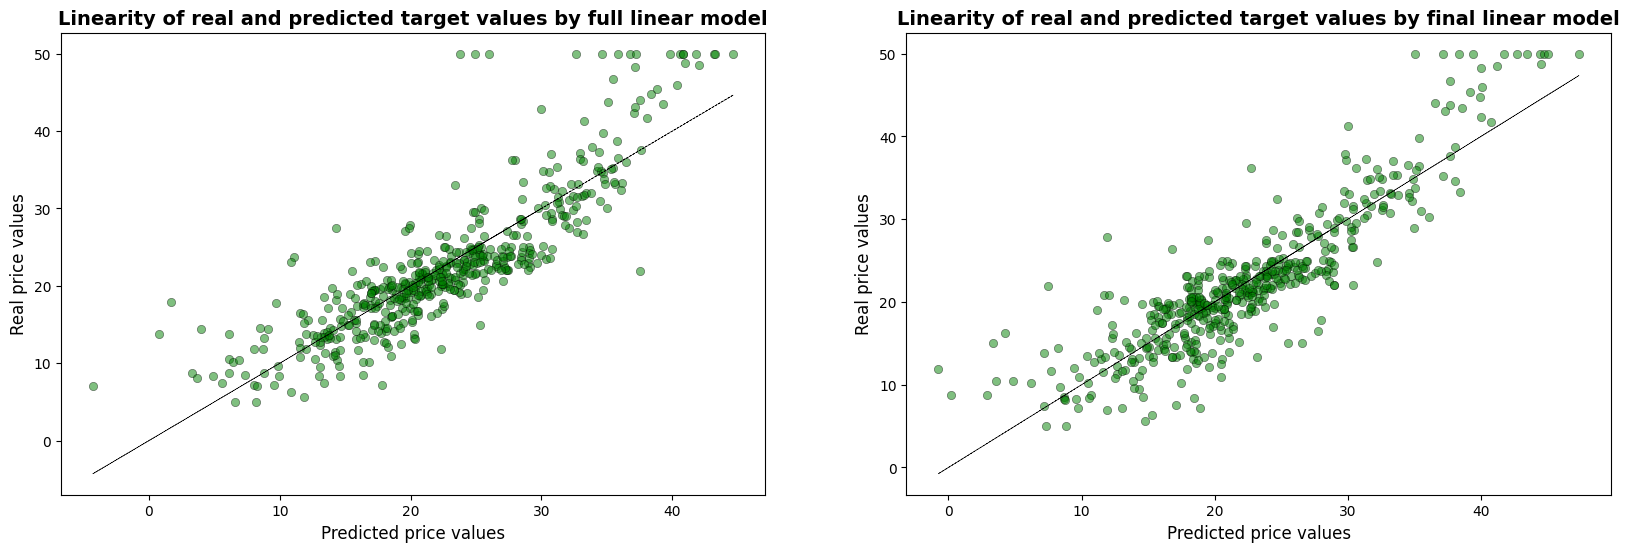

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(x=target_pred, y=target, color='green', edgecolor='black', alpha=0.5, ax=ax1)
ax1.set_title('Linearity of real and predicted target values by full linear model', size=14, weight='bold')
ax1.set_xlabel('Predicted price values', size=12)
ax1.set_ylabel('Real price values', size=12)
ax1.plot(target_pred, slope * target_pred + intercept, linewidth=0.5, color='black', linestyle='--')

sns.scatterplot(x=target_pred_final, y=target_cleaned, color='green', edgecolor='black', alpha=0.5, ax=ax2)
ax2.set_title('Linearity of real and predicted target values by final linear model', size=14, weight='bold')
ax2.set_xlabel('Predicted price values', size=12)
ax2.set_ylabel('Real price values', size=12)
ax2.plot(target_pred_final, slope_final * target_pred_final + intercept_final, linewidth=0.5, color='black', linestyle='--')
;

#### Even though final model is better than the full model, the residuals still are not distributed normally and there is no homoscedasticity observed. ####

In [51]:
residuals_final = target_cleaned - target_pred_final

''

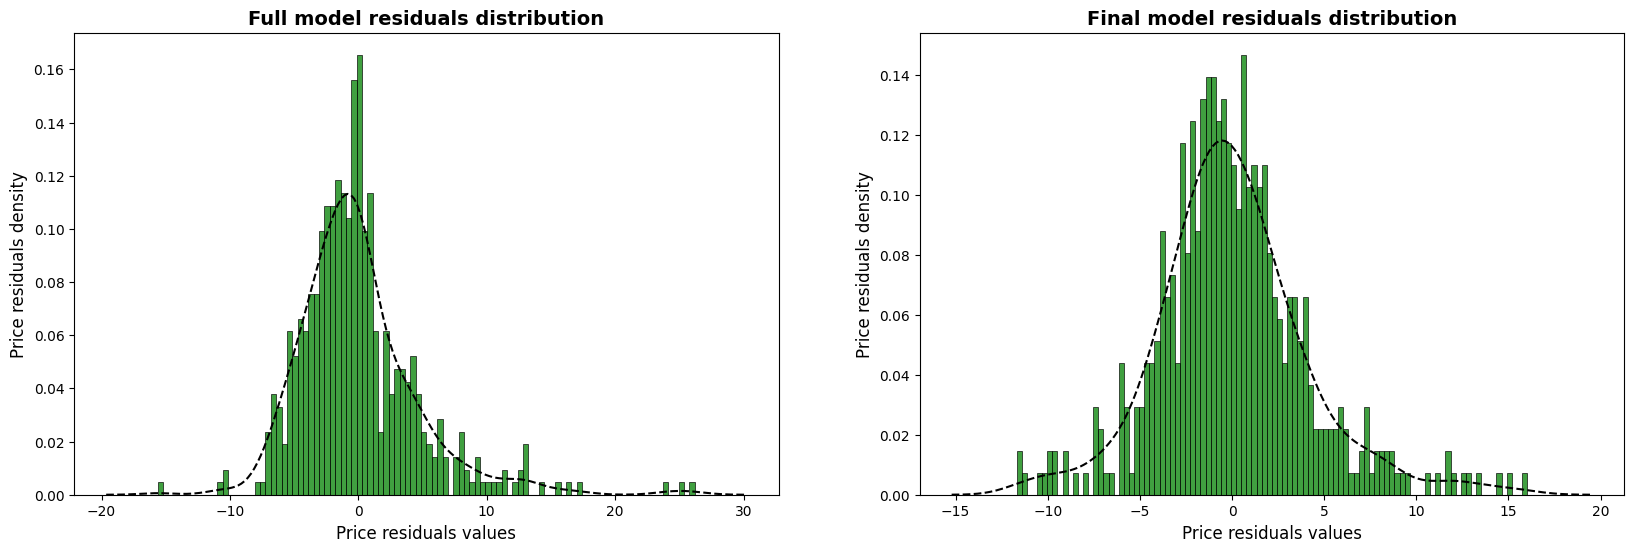

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(residuals, bins=100, stat='density', color='green', ax=ax1)
sns.kdeplot(residuals, color='black', linestyle='--', ax=ax1)
ax1.set_title('Full model residuals distribution', size=14, weight='bold')
ax1.set_ylabel('Price residuals density', size=12)
ax1.set_xlabel('Price residuals values', size=12)

sns.histplot(residuals_final, bins=100, stat='density', color='green', ax=ax2)
sns.kdeplot(residuals_final, color='black', linestyle='--', ax=ax2)
ax2.set_title('Final model residuals distribution', size=14, weight='bold')
ax2.set_ylabel('Price residuals density', size=12)
ax2.set_xlabel('Price residuals values', size=12)
;

''

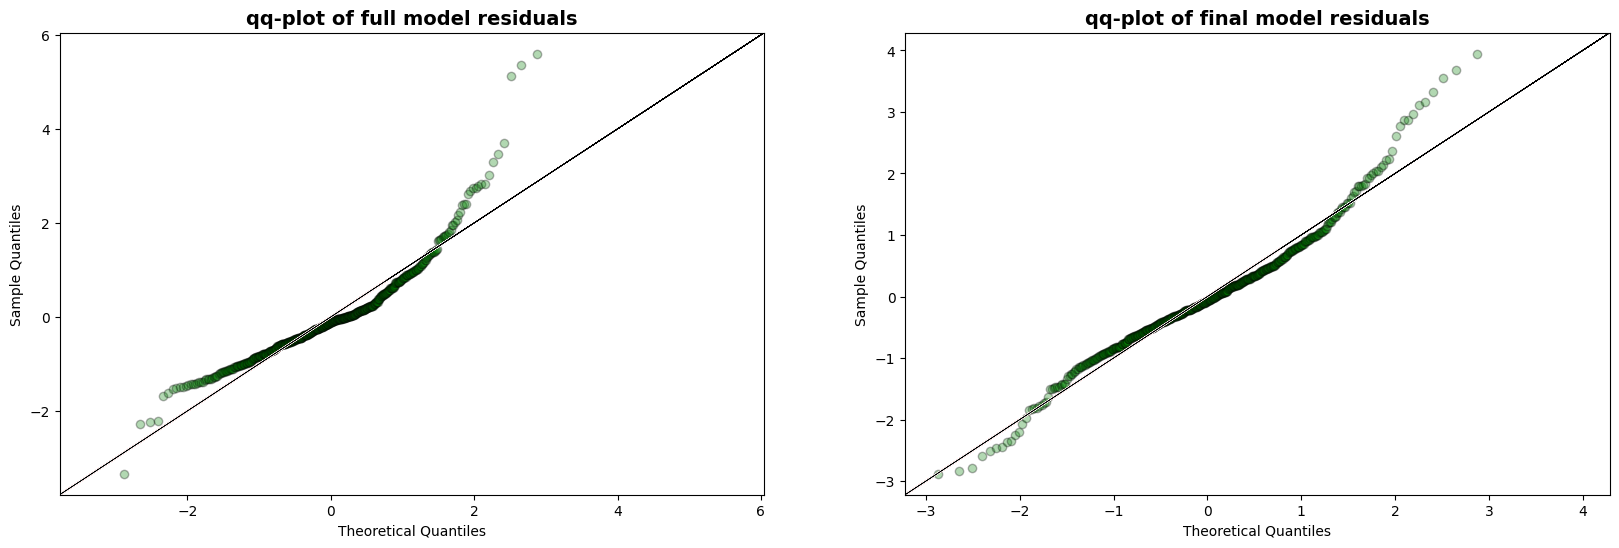

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sm.qqplot(residuals, line='45', fit=True, markerfacecolor='green', markeredgecolor='black', alpha=0.3, ax=ax1)
ax1.plot(target_pred, slope * target_pred + intercept, color='white')
ax1.plot(target_pred, slope * target_pred + intercept, color='black', linewidth=0.5)
ax1.set_title('qq-plot of full model residuals', size=14, weight='bold')

sm.qqplot(residuals_final, line='45', fit=True, markerfacecolor='green', markeredgecolor='black', alpha=0.3, ax=ax2)
ax2.plot(target_pred, slope * target_pred + intercept, color='white')
ax2.plot(target_pred, slope * target_pred + intercept, color='black', linewidth=0.5)
ax2.set_title('qq-plot of final model residuals', size=14, weight='bold')
;

''

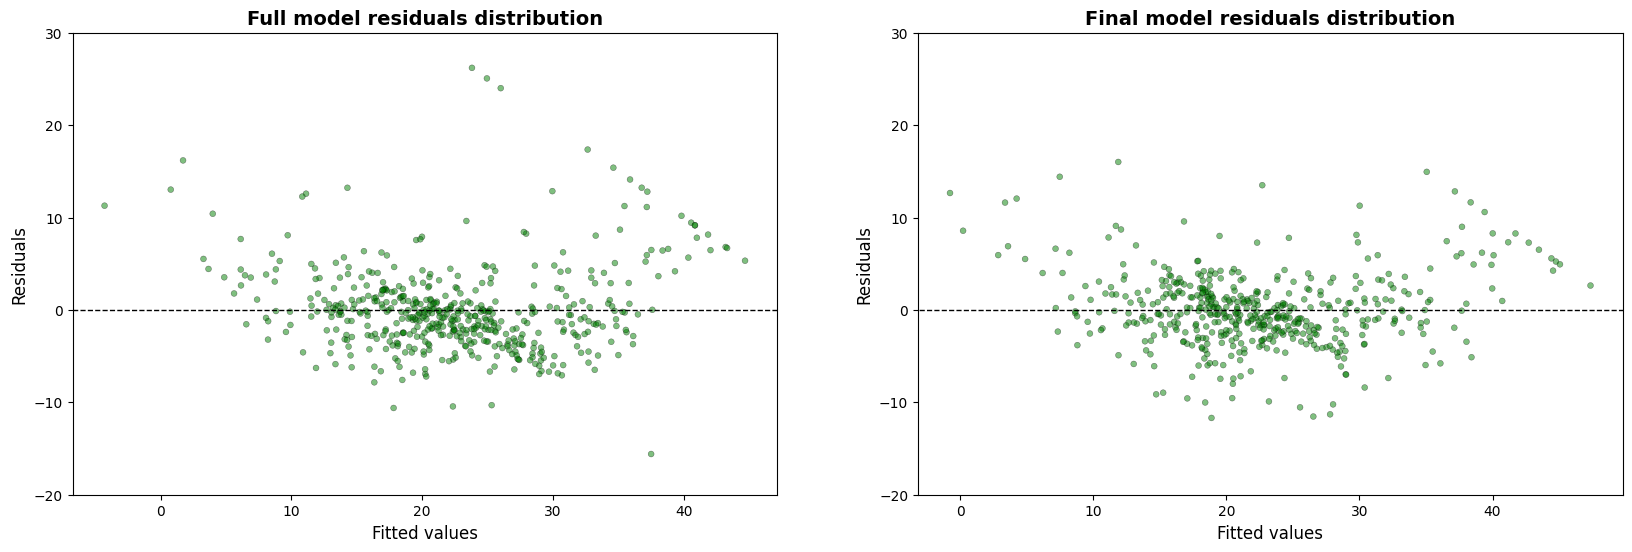

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(x=target_pred, y=residuals, color='green', edgecolor='black', alpha=0.5, size=3, legend=False, ax=ax1)
ax1.set_title('Full model residuals distribution', size=14, weight='bold')
ax1.set_ylabel('Residuals', size=12)
ax1.set_xlabel('Fitted values', size=12)
ax1.axhline(0, -5, 45, color='black', linewidth=1, linestyle='--')
ax1.set_ylim([-20, 30])


sns.scatterplot(x=target_pred_final, y=residuals_final, color='green', edgecolor='black', alpha=0.5, size=3, legend=False, ax=ax2)
ax2.set_title('Final model residuals distribution', size=14, weight='bold')
ax2.set_ylabel('Residuals', size=12)
ax2.set_xlabel('Fitted values', size=12)
ax2.axhline(0, -5, 45, color='black', linewidth=1, linestyle='--')
ax2.set_ylim([-20, 30])
;

In [55]:
print('Null hypothesis: residuals of the full model come from a normal distribution')
k, p = stats.normaltest(residuals)
alpha = 0.05
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

print('Null hypothesis: residuals of the final model come from a normal distribution')
k, p = stats.normaltest(residuals_final)
alpha = 0.05
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Null hypothesis: residuals of the full model come from a normal distribution
p = 2.18204e-39
The null hypothesis can be rejected
Null hypothesis: residuals of the final model come from a normal distribution
p = 7.03486e-10
The null hypothesis can be rejected


In [56]:
params_final = results_7.params.drop('const')
coefficients_final = results_7.params.index.drop('const')
pal = sns.color_palette("Greens", len(coefficients))
rank_final = results_7.params.index.drop('const').argsort().argsort()


''

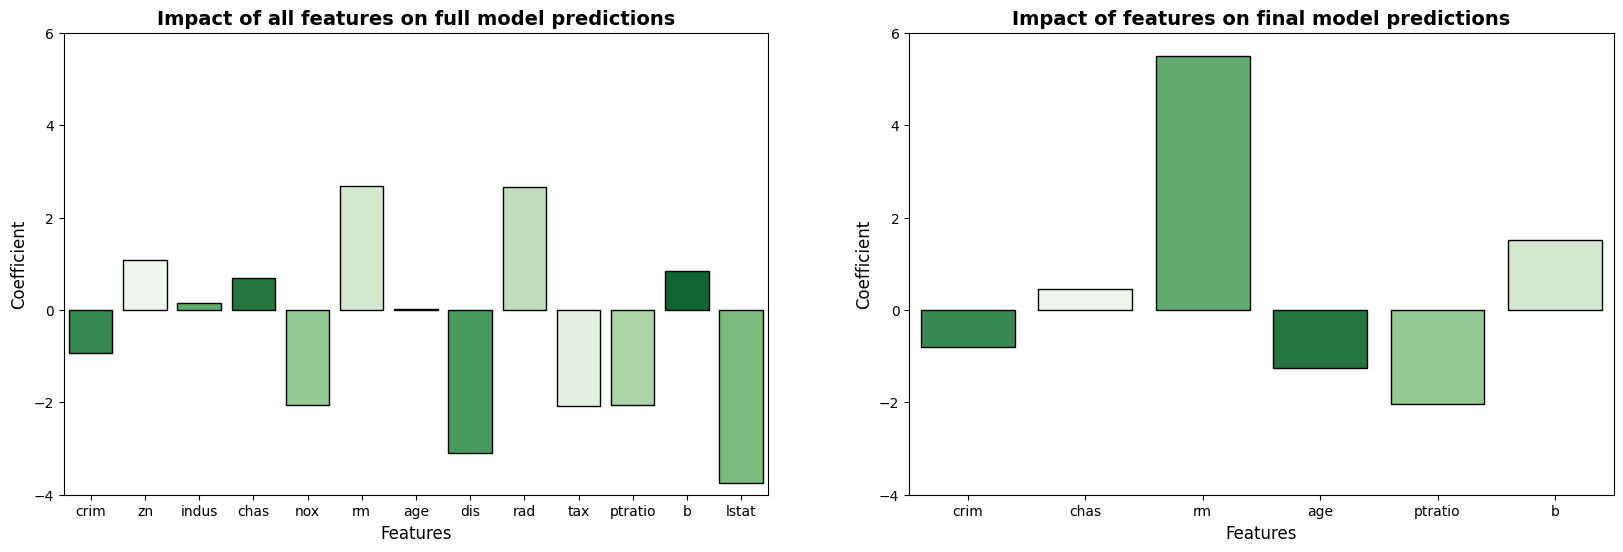

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=coefficients, y=params, palette=np.array(pal[::-1])[rank], edgecolor='black', ax=ax1)
ax1.set_title('Impact of all features on full model predictions', size=14, weight='bold')
ax1.set_ylabel('Coefficient', size=12)
ax1.set_xlabel('Features', size=12)
ax1.set_ylim([-4, 6])

sns.barplot(x=coefficients_final, y=params_final, palette=np.array(pal[::-1])[rank], edgecolor='black', ax=ax2)
ax2.set_title('Impact of features on final model predictions', size=14, weight='bold')
ax2.set_ylabel('Coefficient', size=12)
ax2.set_xlabel('Features', size=12)
ax2.set_ylim([-4, 6])
;

#### Conclusion ####
#### Important variables for our model: ####

- crim - the less is criminal rate in a disctrict, the higher is the price. 
- chas - if the household is located close to a river, its price increases.
- rm - characterises not the district, but each house, an obvious positive dependency.
- age - the more buildings built before 1940 there are in a district, the lower is the price of a household. 
- ptratio - price increases if there are less pupils per teacher in a district, which is probably related to education quality.
- b - price increases if most of the people that live in a district tend to share one race (be either black or white).

Thus, a perfect district for building a house shall be with low criminal rate, be close to a river, have new buildings, a lot of teachers in schools, and people that live there shall be of the same race.

However, one must keep in mind that even after VIF-correction of the model it is still not perfect and quite unreliable due to the lack of normal residues distribution and homoscedasticity.